In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
# My excel link is different from yours, mines prob wrong, its ok for now i dont think it changes anything
tickers = pd.read_excel('https://www.ssga.com/us/en/institutional/ic/library-content/products/fund-data/mf/us/holdings-monthly-us-en-svspx.xlsx', header = 2).Ticker.dropna().to_list()
data = yf.download(tickers = tickers, period = '1y')['Adj Close']
sp500 = data.dropna(how= 'all', axis= 1)
sp500


[*********************100%%**********************]  504 of 504 completed


4 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=1y)')
['K.WI', 'R_SP50', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-05,151.628784,14.1100,145.814972,157.574310,98.510002,103.342644,59.169998,288.161713,334.089996,164.703476,...,85.101929,66.510796,103.322365,30.151529,110.601540,128.492340,121.350334,261.799988,46.111526,153.925919
2022-12-06,150.288254,14.3300,142.115646,157.362869,93.120003,101.823029,60.540001,280.946411,331.149994,163.398331,...,84.744743,67.130585,100.450409,29.649332,109.387329,128.207672,120.467087,254.210007,44.892551,151.666519
2022-12-07,152.651535,13.5500,140.156601,158.977615,91.500000,102.754410,60.150002,282.206360,326.679993,162.907669,...,84.298241,66.694801,100.228012,29.304689,109.555153,125.901093,123.245811,252.539993,44.806843,148.891815
2022-12-08,155.183655,13.6000,141.857086,159.544693,94.830002,104.823021,60.560001,287.580963,332.579987,166.479645,...,85.756790,67.605103,100.972588,29.816732,109.910522,127.451904,124.883263,252.820007,45.121109,152.290817
2022-12-09,151.876999,13.5300,141.369812,156.728470,94.699997,105.401451,60.040001,283.899445,330.640015,165.527771,...,84.328011,67.634155,100.121635,29.797037,109.801949,125.351425,123.454216,251.449997,45.225864,152.003433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,127.589996,12.2300,189.369995,138.500000,126.480003,103.629997,82.379997,333.339996,617.390015,181.853149,...,83.669998,60.000000,102.339996,31.330000,103.500000,125.519997,113.919998,236.619995,35.439999,175.789993
2023-11-30,127.800003,12.4300,189.949997,142.389999,126.339996,104.290001,83.690002,333.140015,611.010010,182.520004,...,84.419998,60.840000,102.739998,31.750000,105.129997,125.550003,116.309998,236.979996,35.630001,176.669998
2023-12-01,128.789993,13.0200,191.240005,143.410004,135.020004,104.879997,82.629997,338.059998,612.469971,183.070007,...,85.150002,61.430000,102.989998,32.549999,106.199997,127.330002,117.970001,241.220001,38.320000,179.130005


<Axes: xlabel='Date'>

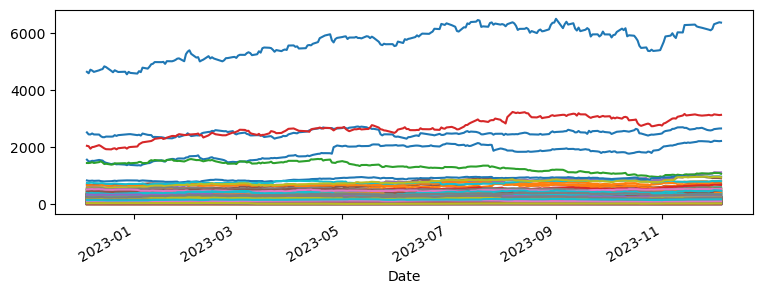

In [3]:

# I graphed each stock in sp500, to visualize the lines were analyzing
# Our trend line would follow Y = mx+b, we need the slope for each stock
sp500.plot(figsize = (9,3),legend= None) 

In [4]:
# window = 20 days
lag = 20

# 
returns = sp500.pct_change()
# returns.tail()

lagged_returns = sp500.shift(lag).pct_change()


# PAST 52 WEEK
#last_52_week = sp500[-252:]
last_52_week = lagged_returns[-252:]

len(last_52_week)


252

In [5]:
def calculate_slope(data):
    x = np.arange(len(data))
    y = data.values
    slope, _ = np.polyfit(x, y, 1)
    return slope

In [16]:
calculate_slope(sp500)

array([-1.84644046e-01, -9.18312982e-03,  2.14640047e-01, -4.09714829e-02,
        1.38532189e-01, -3.41439057e-02,  9.77909783e-02,  2.54894000e-01,
        1.20024725e+00,  2.01470204e-02, -4.45183456e-02,  4.80569592e-02,
        5.00708153e-02, -4.18672486e-02, -7.40808308e-02, -5.34505648e-02,
        5.82631241e-02,  1.87753415e-02,  1.51444311e-01,  2.55436225e-01,
        1.34576585e-01, -4.77477453e-01,  3.47874951e-02, -4.61855812e-02,
       -2.75354351e-02, -1.88101958e-02,  1.94331589e-01, -1.19048461e-02,
        1.89774004e-01,  6.49109763e-02,  9.10049865e-02,  1.02027204e-01,
       -1.48093732e-01,  2.44731887e-01,  3.58536323e-01,  1.62624641e-01,
        1.08167788e-01,  5.27717127e-02, -6.63427235e-03, -6.88332360e-02,
        4.58211172e-02, -7.37341054e-02, -2.05516136e-01, -4.04965687e-04,
        5.95871045e-02,  1.82287462e+00,  1.58646770e-02, -1.10343485e-01,
        1.10459806e-01, -5.03324586e-03,  5.82145920e-01,  3.06600933e-02,
       -2.07438535e-02, -

In [7]:
# Slope is our (y2-y1)[change of price] 
# divided by (x1-x2)[change of 1 year]
open_price = sp500.iloc[0] # first data entry
close_price = sp500.iloc[-1] # most recent data entry
price_difference = close_price - open_price
# Since our change of time is 1 year, im just going to divide by count of rows
slope = price_difference / len(sp500) * 100
slope

A       -9.949914
AAL     -0.412103
AAPL    18.724811
ABBV    -5.251712
ABNB    14.019839
          ...    
YUM     -1.584262
ZBH     -2.220372
ZBRA   -11.210311
ZION    -3.357748
ZTS     10.122650
Length: 500, dtype: float64

In [8]:
# Im assuming 260 day low refers to trading days in year
# Since we have roughly 251 rows of data, well get the low of what we have already
# Take the difference with our current price, then divide over the low
present_low_change = close_price - sp500.min()
percent_above_260 = (present_low_change / sp500.min()) * 100
percent_above_260 

A       25.091433
AAL     19.702379
AAPL    55.239379
ABBV    11.237621
ABNB    62.249969
          ...    
YUM      7.603354
ZBH     12.689832
ZBRA    17.960501
ZION    96.826222
ZTS     27.094682
Length: 500, dtype: float64

In [9]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)
# notice the equation is same
# time period changes, im just gonna run a for loop with the formula
# and change the times for 4wk (20 data entries) and 52wk(all data entries)
data_indexes = (20, len(sp500))
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= close_price - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


#Note : he doesnt want us to use for loops but this one only loops twice, 
# and I only did it because the formula is redundant so I didnt want to write it twice 

A       44.618129
AAL     55.290420
AAPL     4.085733
ABBV    54.026039
ABNB    21.461391
          ...    
YUM    -25.947242
ZBH     53.383098
ZBRA    55.942591
ZION    27.155497
ZTS      7.233489
Length: 500, dtype: float64

In [10]:
# 39 week returns sounds simple
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries

price_39_weeks_ago = sp500.iloc[-195] # 195 data entries away (39 weeks | 5 entries per week)
price_difference_39_weeks = close_price - price_39_weeks_ago
price_difference_39_weeks # I think this is all we need for the return, right?



A      -14.629295
AAL     -2.908500
AAPL    46.187042
ABBV    -4.990326
ABNB    10.559998
          ...    
YUM     -0.886093
ZBH     -7.406372
ZBRA   -66.699997
ZION   -10.934399
ZTS     13.555740
Length: 500, dtype: float64

In [11]:
# 51 week volume price trend 
# Multiply weekly avg volume by percent change in price each of the past 51 weeks

# Can we just use std for volume?
# vpt = sum of (the weekly volumes * weekly price change )

In [12]:

sp500.index = pd.to_datetime(sp500.index)

# Just found out i can Resample to weekly frequency and calculate the mean and volume that way -_-. 
# 'W' stands for week
weekly_means = sp500.resample('W').mean()
weekly_std = sp500.resample('W').std()

vpt = weekly_means.pct_change() * weekly_std # Not sure if correct formula 
volume_price_trend = vpt.sum() 




In [13]:
# Made a neat table that can help with 
# calculations and saving our momentum factors


test = sp500.copy().transpose()

volume = sp500.std()
test['Volume'] = volume
means = sp500.mean()
test['Mean'] = means



new_table = test[['Volume', 'Mean']]
new_table # Needs a name



Date,Volume,Mean
A,15.072455,128.822348
AAL,1.887614,14.503181
AAPL,18.761958,167.867544
ABBV,7.530974,145.963645
ABNB,15.437988,120.838909
...,...,...
YUM,4.989095,128.723083
ZBH,10.743221,124.994380
ZBRA,33.890807,269.893016
ZION,8.164534,35.496678


In [14]:
new_table['Slope 52 Week Trend-Line'] = slope
new_table['Percent above 260'] = percent_above_260
new_table['4/52 Week Oscillator'] = oscillator
new_table['39 Week Return'] = price_difference_39_weeks
new_table['51 Week Volume Price Trend'] = volume_price_trend

/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_14476/3713454937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Slope 52 Week Trend-Line'] = slope
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_14476/3713454937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Percent above 260'] = percent_above_260
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_14476/3713454937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [15]:
new_table

Date,Volume,Mean,Slope 52 Week Trend-Line,Percent above 260,4/52 Week Oscillator,39 Week Return,51 Week Volume Price Trend
A,15.072455,128.822348,-9.949914,25.091433,44.618129,-14.629295,-0.102354
AAL,1.887614,14.503181,-0.412103,19.702379,55.290420,-2.908500,0.132784
AAPL,18.761958,167.867544,18.724811,55.239379,4.085733,46.187042,0.572410
ABBV,7.530974,145.963645,-5.251712,11.237621,54.026039,-4.990326,-0.285663
ABNB,15.437988,120.838909,14.019839,62.249969,21.461391,10.559998,1.549975
...,...,...,...,...,...,...,...
YUM,4.989095,128.723083,-1.584262,7.603354,-25.947242,-0.886093,-0.105150
ZBH,10.743221,124.994380,-2.220372,12.689832,53.383098,-7.406372,-0.298051
ZBRA,33.890807,269.893016,-11.210311,17.960501,55.942591,-66.699997,-3.281542
ZION,8.164534,35.496678,-3.357748,96.826222,27.155497,-10.934399,-0.133562
